In [1]:
import pandas as pd
from dataPreparation import data_preparation

df_rent, df_house_price, df_rent_price = data_preparation()

# there are NaN, we replace them with 0
df = df_rent.fillna(0)
df_house_price = df_house_price.fillna(0)
df_rent_price = df_rent_price.fillna(0)

df

,title,text-data,desktop-hidden 2,desktop-hidden 4
0,Apartment for rent in Roma Municipio IX – EUR...,43 m2 apartment for rent in Roma Municipio IX ...,830 EUR,43 m2
1,Apartment for rent in Roma Municipio XII – Mo...,55 m2 apartment for rent in Roma Municipio XII...,800 EUR,55 m2
2,Apartment for rent in Acilia-Castel Fusano-Os...,65 m2 apartment for rent in Acilia-Castel Fusa...,650 EUR,65 m2
3,Apartment for rent in Roma Municipio I – Cent...,50 m2 apartment for rent in Roma Municipio I –...,850 EUR,50 m2
4,Apartment for rent in Roma Municipio X – Osti...,75 m2 apartment for rent in Roma Municipio X –...,850 EUR,75 m2
...,...,...,...,...
6472,"Apartment for rent in Püssi, Estonia",Apartment for rent in Püssi,225 EUR,0
6473,"Apartment for rent in Tallinn Kesklinna, Estonia",Apartment for rent in Tallinn Kesklinna,350 EUR,0
6474,"Apartment for rent in Maardu, Estonia",Apartment for rent in Maardu,200 EUR,0
6475,"Apartment for rent in Narva-Jõesuu, Estonia",Apartment for rent in Narva-Jõesuu,800 EUR,0


In [2]:
# create a new column with the country name by taking the last word of the column 'title'
splitted = df['title'].str.split()
df['country'] = splitted.str[-1]
df['country'].replace({'Republic':'Czech Republic'}) # replace the 'Republic' with 'Czech Republic'

# drop useless columns
df.drop(columns=['title'], inplace=True)
df.drop(columns=['text-data'], inplace=True)

df

,desktop-hidden 2,desktop-hidden 4,country
0,830 EUR,43 m2,Italy
1,800 EUR,55 m2,Italy
2,650 EUR,65 m2,Italy
3,850 EUR,50 m2,Italy
4,850 EUR,75 m2,Italy
...,...,...,...
6472,225 EUR,0,Estonia
6473,350 EUR,0,Estonia
6474,200 EUR,0,Estonia
6475,800 EUR,0,Estonia


In [3]:
# rename the columns and replace 'Not specified' prices with 0
df.rename(columns={"desktop-hidden 2": "price", "desktop-hidden 4": "surface"}, inplace=True)

df['price'] = df['price'].astype(str)
df['price'].replace({'0,':'0'}, regex=True, inplace=True)
df['price'].replace({'1,':'1'}, regex=True, inplace=True)
df['price'].replace({'2,':'2'}, regex=True, inplace=True)
df['price'].replace({'3,':'3'}, regex=True, inplace=True)
df['price'].replace({'4,':'4'}, regex=True, inplace=True)
df['price'].replace({'5,':'5'}, regex=True, inplace=True)
df['price'].replace({'6,':'6'}, regex=True, inplace=True)
df['price'].replace({'7,':'7'}, regex=True, inplace=True)
df['price'].replace({'8,':'8'}, regex=True, inplace=True)
df['price'].replace({'9,':'9'}, regex=True, inplace=True)

df['surface'].replace({'0,':'0'}, regex=True, inplace=True)
df['surface'].replace({'1,':'1'}, regex=True, inplace=True)
df['surface'].replace({'2,':'2'}, regex=True, inplace=True)
df['surface'].replace({'3,':'3'}, regex=True, inplace=True)
df['surface'].replace({'4,':'4'}, regex=True, inplace=True)
df['surface'].replace({'5,':'5'}, regex=True, inplace=True)
df['surface'].replace({'6,':'6'}, regex=True, inplace=True)
df['surface'].replace({'7,':'7'}, regex=True, inplace=True)
df['surface'].replace({'8,':'8'}, regex=True, inplace=True)
df['surface'].replace({'9,':'9'}, regex=True, inplace=True)

df = df[df['price'] != "Not specified"]
df = df[df['surface'] != 0]
df = df[df['price'] != 0]

df

,price,surface,country
0,830 EUR,43 m2,Italy
1,800 EUR,55 m2,Italy
2,650 EUR,65 m2,Italy
3,850 EUR,50 m2,Italy
4,850 EUR,75 m2,Italy
...,...,...,...
6422,200 EUR,61 m2,Estonia
6423,300 EUR,26 m2,Estonia
6424,500 EUR,51 m2,Estonia
6425,400 EUR,40 m2,Estonia


In [4]:
#convert all the prices to € and remove the 'EUR'

# CHF, DKK, PLN, SEK, CZK, BGN, HUF, RON, Iceland
# create multiplier for the prices
multiplier = {'EUR': 1, 'CHF': 1, 'DKK': 0.13, 'PLN': 0.21, 'SEK': 0.09, 'CZK': 0.04, 'BGN': 0.51, 'HUF': 0.0025, 'RON': 0.2, 'ISK': 0.0072, 'NOK': 0.096}

prices = []
for price in df['price']:
    if price.find('EUR') != -1:
        price = price.replace('EUR', '')
        price = float(price) * multiplier['EUR']
    elif price.find('CHF') != -1:
        price = price.replace('CHF', '')
        price = float(price) * multiplier['CHF']
    elif price.find('DKK') != -1:
        price = price.replace('DKK', '')
        price = float(price) * multiplier['DKK']
    elif price.find('PLN') != -1:
        price = price.replace('PLN', '')
        price = float(price) * multiplier['PLN']
    elif price.find('SEK') != -1:
        price = price.replace('SEK', '')
        price = float(price) * multiplier['SEK']
    elif price.find('CZK') != -1:
        price = price.replace('CZK', '')
        price = float(price) * multiplier['CZK']
    elif price.find('BGN') != -1:
        price = price.replace('BGN', '')
        price = float(price) * multiplier['BGN']
    elif price.find('HUF') != -1:
        price = price.replace('HUF', '')
        price = float(price) * multiplier['HUF']
    elif price.find('RON') != -1:
        price = price.replace('RON', '')
        price = float(price) * multiplier['RON']
    elif price.find('ISK') != -1:
        price = price.replace('ISK', '')
        price = float(price) * multiplier['ISK']
    elif price.find('NOK') != -1:
        price = price.replace('NOK', '')
        price = float(price) * multiplier['NOK']
    else:
        price = float(price)
    prices.append(price)
df['price'] = prices

#mult = df['price'].str.contains('PLN').map({ True : 0.21, False : 1})
#mult = df['price'].str.contains('SEK').map({ True : 0.09, False : 1})
#mult = df['price'].str.contains('CZK').map({ True : 0.04, False : 1})
#mult = df['price'].str.contains('BGN').map({ True : 0.51, False : 1})
#mult = df['price'].str.contains('HUF').map({ True : 0.0025, False : 1})
#mult = df['price'].str.contains('RON').map({ True : 0.2, False : 1})
# extract values
#values = df['price'].str.replace(r'\D+', '').astype(float)
#df['price'] = values * mult
#df['price'] = df['price'].astype(int)

print(df)

      price surface  country
0     830.0   43 m2    Italy
1     800.0   55 m2    Italy
2     650.0   65 m2    Italy
3     850.0   50 m2    Italy
4     850.0   75 m2    Italy
...     ...     ...      ...
6422  200.0   61 m2  Estonia
6423  300.0   26 m2  Estonia
6424  500.0   51 m2  Estonia
6425  400.0   40 m2  Estonia
6426  950.0   57 m2  Estonia

[5043 rows x 3 columns]


In [5]:
df['surface'].replace({' m2':''}, regex=True, inplace=True)
df['surface'] = df['surface'].astype(float)

df['index'] = df['price']/df['surface']
# remove ousiders
df = df[df['index'] < 1000]

df.to_csv('result.csv', sep='\t')

<AxesSubplot:title={'center':'Average index by country'}, xlabel='Country', ylabel='Average index'>

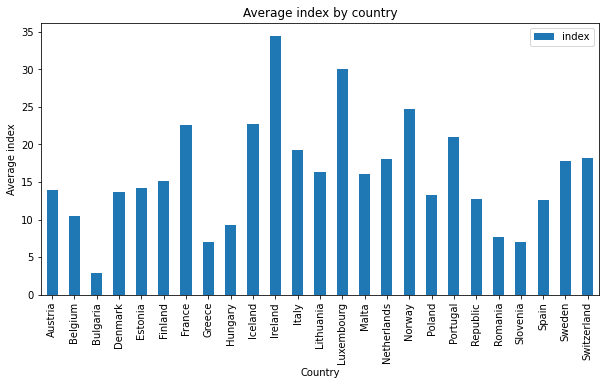

In [6]:
#df = df[df['index'] < 100]
df = df[df['index'].isna() == False]
df.groupby(['country'])['index'].mean().plot(legend=True, kind='bar', figsize=(10,5), title='Average index by country', xlabel='Country', ylabel='Average index')

<AxesSubplot:xlabel='country'>

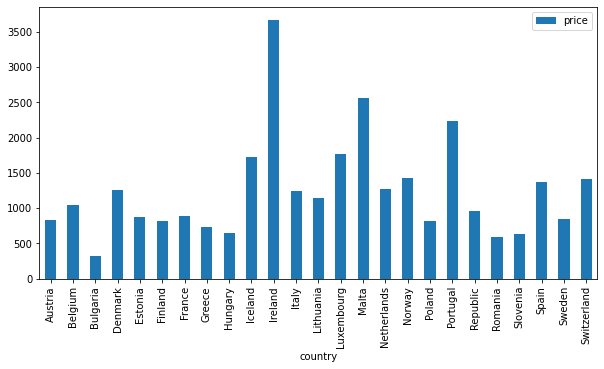

In [7]:
df.groupby(['country'])['price'].mean().plot(legend=True, kind='bar', figsize=(10,5))

In [8]:
# Create a Map with geojson

In [9]:
df_house_price.rename(columns={"Unnamed: 0": "country"}, inplace=True)
df_house_price

,country,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Austria,0.0,0.0,0.0,0.0,78.0,77.0,76.0,76.0,73.0,...,88,93,95,97,100,107,111,114,118,126
1,Belgium,57.0,57.0,60.0,64.0,66.0,67.0,71.0,75.0,79.0,...,100,100,101,99,100,101,103,104,106,110
2,Czech Republic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99,95,95,96,100,107,116,123,131,138
3,Denmark,54.0,60.0,64.0,67.0,70.0,72.0,73.0,76.0,83.0,...,93,88,91,94,100,105,108,112,114,120
4,Estonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74,77,82,93,100,103,105,108,112,120
5,Finland,59.0,67.0,72.0,76.0,77.0,74.0,77.0,81.0,87.0,...,104,103,102,100,100,101,101,101,101,102
6,France,52.0,51.0,52.0,56.0,60.0,63.0,68.0,75.0,84.0,...,109,107,104,102,100,101,103,104,107,112
7,Germany,108.0,105.0,104.0,103.0,103.0,101.0,98.0,97.0,95.0,...,91,92,94,96,100,107,112,117,122,131
8,Greece,0.0,83.0,96.0,100.0,111.0,125.0,139.0,143.0,142.0,...,139,122,110,104,100,98,97,99,106,112
9,Hungary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99,90,86,89,100,112,122,135,151,153


In [10]:
import matplotlib.pyplot as plt

df_rent_price.rename(columns={"Unnamed: 0": "country"}, inplace=True)
df_rent_price

,country,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Austria,56.0,58.0,59.0,61.0,62.0,63.0,65.0,67.0,70.0,...,86,89,92,96,100,103,107,111,115,119
1,Belgium,71.0,73.0,73.0,74.0,76.0,77.0,79.0,81.0,82.0,...,94,96,97,99,100,101,102,103,104,107
2,Czech Republic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99,95,95,96,100,107,116,123,131,140
3,Denmark,54.0,60.0,64.0,67.0,70.0,72.0,73.0,76.0,83.0,...,93,88,91,94,100,105,108,112,114,122
4,Estonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74,77,82,93,100,103,105,108,112,115
5,Finland,59.0,67.0,72.0,76.0,77.0,74.0,77.0,81.0,87.0,...,104,103,102,100,100,101,101,101,101,100
6,France,70.0,71.0,73.0,74.0,74.0,74.0,76.0,78.0,80.0,...,95,97,98,99,100,100,101,100,101,101
7,Germany,79.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,...,95,96,97,99,100,101,103,104,106,107
8,Greece,65.0,70.0,75.0,78.0,81.0,84.0,89.0,93.0,98.0,...,124,122,113,105,100,97,95,92,92,92
9,Hungary,0.0,0.0,0.0,0.0,42.0,49.0,54.0,59.0,64.0,...,92,96,98,98,100,105,108,114,125,130


<AxesSubplot:xlabel='country'>

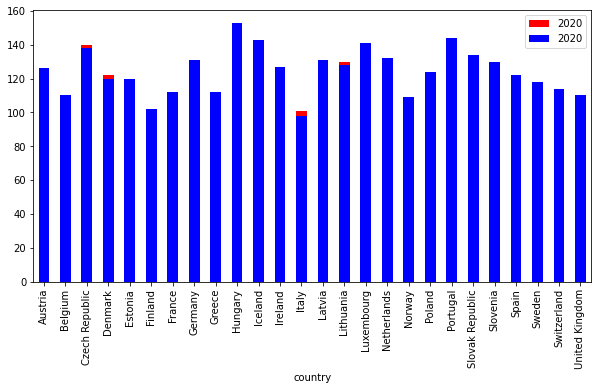

In [15]:
ax = plt.gca()
  
#use plot() method on the dataframe
df_rent_price.plot( x = 'country', y = '2020', ax = ax, figsize=(10,5), legend=True, kind='bar', color='red', rot=0)
df_house_price.plot( x = 'country', y = '2020', ax = ax, figsize=(10,5), legend=True, kind='bar', color='blue')

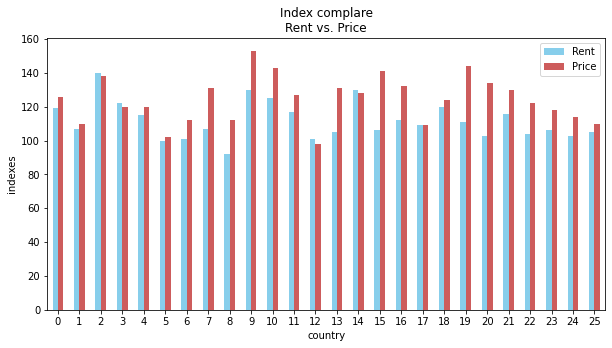

In [21]:

countries = df_rent_price['country']
rentSeries = df_rent_price['2020']
priceSeries = df_house_price['2020']

df = pd.DataFrame({"Rent":rentSeries,"Price":priceSeries})

ax = df.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Index complare\nRent vs. Price", figsize=(10,5))
ax.set_xlabel("country")
ax.set_ylabel("indexes")
plt.show()

<AxesSubplot:xlabel='country'>

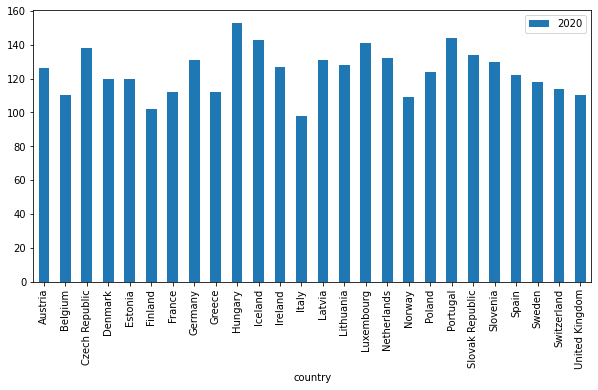

In [12]:
ax = plt.gca()
  
#use plot() method on the dataframe
df_house_price.plot( x = 'country', y = '2020', ax = ax, figsize=(10,5), legend=True, kind='bar')

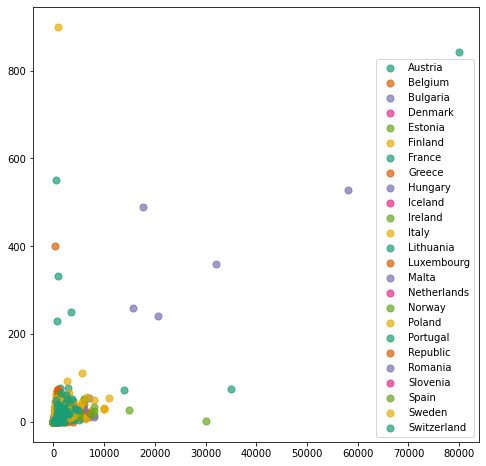

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

PRICE_LENGTH = df["price"].values
INDEX_LENGTH = df["index"].values

COUNTRIES = df["country"].values
COUNTRIES_ = np.unique(COUNTRIES)

COLORS = ["#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#1B9E77", "#D95F02", "#7570B3", "#E7298A", "#66A61E", "#E6AB02"]

fig, ax = plt.subplots(figsize=(8,8))
for country, color in zip(COUNTRIES_, COLORS):
    idxs = np.where(COUNTRIES == country)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        PRICE_LENGTH[idxs], INDEX_LENGTH[idxs], label=country,
        s=50, color=color, alpha=0.7
    )
    
ax.legend();